In [79]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("C:\\Users\\PoojaLocal\\Downloads\\dds_test.csv")  
print(df.head())  
print(df.info())  

   Year   County                    Race/Ethnicity  Number of Consumers  \
0  2014  Alameda  American Indian or Alaska Native                 33.0   
1  2014  Alameda                             White               1411.0   
2  2014  Alameda                Hispanic or Latino                849.0   
3  2014  Alameda         Black or African American               1774.0   
4  2014  Alameda                             Asian                413.0   

   Annotation Code Count Annotation Desc  Percent Percent Annotation Desc  
0              NaN                   NaN      NaN                     NaN  
1              NaN                   NaN      NaN                     NaN  
2              NaN                   NaN      NaN                     NaN  
3              NaN                   NaN      NaN                     NaN  
4              NaN                   NaN      NaN                     NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544 entries, 0 to 3543
Data columns (total

In [80]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Year                          0
County                        0
Race/Ethnicity                0
Number of Consumers        1322
Annotation Code            2222
Count Annotation Desc      2222
Percent                    2222
Percent Annotation Desc    2222
dtype: int64


In [87]:
# Check column data types
print("\nData Types:")
print(df.dtypes)



Data Types:
Year                         int64
County                      object
Race/Ethnicity              object
Number of Consumers        float64
Annotation Code            float64
Count Annotation Desc       object
Percent                    float64
Percent Annotation Desc     object
dtype: object


In [88]:
# Replace 'Unknown' with a more descriptive term like 'Missing'
df_check['Count Annotation Desc'] = df_check['Count Annotation Desc'].replace('Unknown', 'Missing')

# Replace 'Cell suppressed for small number' with 'Suppressed'
df_check['Count Annotation Desc'] = df_check['Count Annotation Desc'].replace('Cell suppressed for small number.', 'Suppressed')

# Verify changes
print(df_check['Count Annotation Desc'].value_counts())


Missing                                                                                                    2222
Cell suppressed for small number. A score over 12 using the Publication scoring criteria, data omitted.    1322
Name: Count Annotation Desc, dtype: int64


In [89]:
# Changes- Fill missing values with a default value (e.g., 0 for numeric, 'Unknown' for categorical)
df_filled = df.fillna({
    'Number of Consumers': 0,  # Default value for numeric columns
    'Race/Ethnicity': 'Unknown',  # Placeholder for categorical columns
    'Annotation Code': 0,  # Or another appropriate value for annotation codes
    'Percent': 0  # If percent is missing
})



In [83]:
# Verify changes
print("\nMissing Values After Handling (filled):")
print(df_filled.isnull().sum())


Missing Values After Handling (filled):
Year                          0
County                        0
Race/Ethnicity                0
Number of Consumers           0
Annotation Code               0
Count Annotation Desc      2222
Percent                       0
Percent Annotation Desc    2222
dtype: int64


In [90]:
# Change- Fill missing values with 'Unknown'
df_filled = df_filled.fillna({
    'Count Annotation Desc': 'Unknown',  
    'Percent Annotation Desc': 'Unknown'  
})

# Verify changes
print("\nMissing Values After Filling Annotation Columns:")
print(df_filled.isnull().sum())



Missing Values After Filling Annotation Columns:
Year                       0
County                     0
Race/Ethnicity             0
Number of Consumers        0
Annotation Code            0
Count Annotation Desc      0
Percent                    0
Percent Annotation Desc    0
dtype: int64


In [91]:
# Group by County & sum of 'Number of Consumers'
county_group = df_filled.groupby('County')['Number of Consumers'].sum()

print("\nTotal Number of Consumers by County:")
print(county_group)



Total Number of Consumers by County:
County
Alameda             35016.0
Alpine                  0.0
Amador                201.0
Butte                6867.0
Calaveras             222.0
Colusa                138.0
Contra Costa        22636.0
Del Norte            1234.0
El Dorado            2675.0
Fresno              18461.0
Glenn                 647.0
Humboldt             5380.0
Imperial             7671.0
Inyo                    0.0
Kern                15050.0
Kings                2346.0
Lake                 1285.0
Lassen                994.0
Los Angeles        245098.0
Madera               1378.0
Marin                3863.0
Mariposa               14.0
Mendocino            4553.0
Merced               6435.0
Modoc                 102.0
Mono                    0.0
Monterey             8728.0
Napa                 3853.0
Nevada               2448.0
Not Reported         1658.0
Orange              52381.0
Out of State         2232.0
Placer               9570.0
Plumas                296.0
Riv

In [101]:
# Group by Race/Ethnicity
ethnicity_group = df_filled.groupby('Race/Ethnicity')['Percent'].mean()

print("\nAverage Percent by Race/Ethnicity:")
print(ethnicity_group)



Average Percent by Race/Ethnicity:
Race/Ethnicity
African American                    0.295238
American Indian                     0.594752
American Indian or Alaska Native    0.537634
Asian                               0.401425
Black or African American           0.253333
Hispanic                            0.168116
Hispanic or Latino                  0.209581
Multi                               0.306709
Multiple Ethnicities Selected       0.394737
Not Reported                        0.565111
Pacific Islander                    0.705686
White                               0.144712
Name: Percent, dtype: float64


In [102]:
# Save cleaned data to a new CSV file
df_filled.to_csv("C:\\Users\\PoojaLocal\\Desktop\\cleaned_dds_test.csv", index=False)


In [103]:
# Load the cleaned data
df_check = pd.read_csv("C:\\Users\\PoojaLocal\\Desktop\\cleaned_dds_test.csv")

# Preview the first few rows
print(df_check.head())

# Verify if any missing values are left
print("\nMissing Values in Cleaned Data:")
print(df_check.isnull().sum())


   Year   County                    Race/Ethnicity  Number of Consumers  \
0  2014  Alameda  American Indian or Alaska Native                 33.0   
1  2014  Alameda                             White               1411.0   
2  2014  Alameda                Hispanic or Latino                849.0   
3  2014  Alameda         Black or African American               1774.0   
4  2014  Alameda                             Asian                413.0   

   Annotation Code Count Annotation Desc  Percent Percent Annotation Desc  
0              0.0               Unknown      0.0                 Unknown  
1              0.0               Unknown      0.0                 Unknown  
2              0.0               Unknown      0.0                 Unknown  
3              0.0               Unknown      0.0                 Unknown  
4              0.0               Unknown      0.0                 Unknown  

Missing Values in Cleaned Data:
Year                       0
County                     0
Ra

In [104]:
# Get summary statistics
print(df_check.describe())


              Year  Number of Consumers  Annotation Code      Percent
count  3544.000000          3544.000000      3544.000000  3544.000000
mean   2018.024549           229.839729         0.373025     0.373025
std       2.572179           852.973560         0.483677     0.483677
min    2014.000000             0.000000         0.000000     0.000000
25%    2016.000000             0.000000         0.000000     0.000000
50%    2018.000000            22.000000         0.000000     0.000000
75%    2020.000000           127.000000         1.000000     1.000000
max    2022.000000         14863.000000         1.000000     1.000000


In [105]:
# Correlation matrix
print(df_check.corr())


                         Year  Number of Consumers  Annotation Code   Percent
Year                 1.000000            -0.023231        -0.044796 -0.044796
Number of Consumers -0.023231             1.000000        -0.207871 -0.207871
Annotation Code     -0.044796            -0.207871         1.000000  1.000000
Percent             -0.044796            -0.207871         1.000000  1.000000


In [106]:
# Grouping by County and Race/Ethnicity to sum Number of Consumers
df_aggregated = df_check.groupby(['County', 'Race/Ethnicity'])['Number of Consumers'].sum().reset_index()

# Top counties by number of consumers
df_top_counties = df_aggregated.sort_values(by='Number of Consumers', ascending=False)
print(df_top_counties.head())


          County      Race/Ethnicity  Number of Consumers
198  Los Angeles            Hispanic              75321.0
204  Los Angeles               White              54982.0
199  Los Angeles  Hispanic or Latino              38997.0
193  Los Angeles    African American              33330.0
425    San Diego               White              28974.0


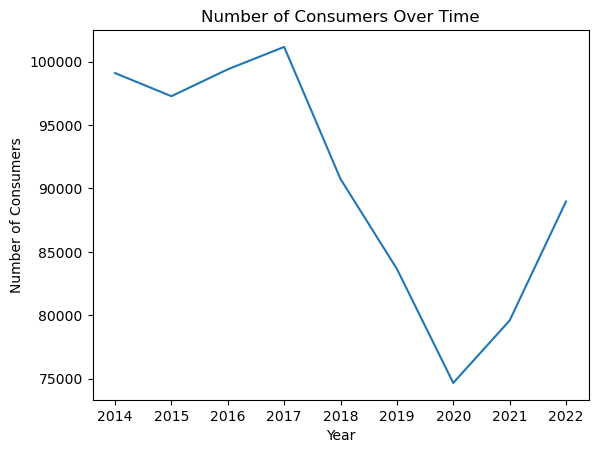

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping 
df_yearly = df_check.groupby('Year')['Number of Consumers'].sum().reset_index()

# Plotting the trend
sns.lineplot(x='Year', y='Number of Consumers', data=df_yearly)
plt.title('Number of Consumers Over Time')
plt.show()


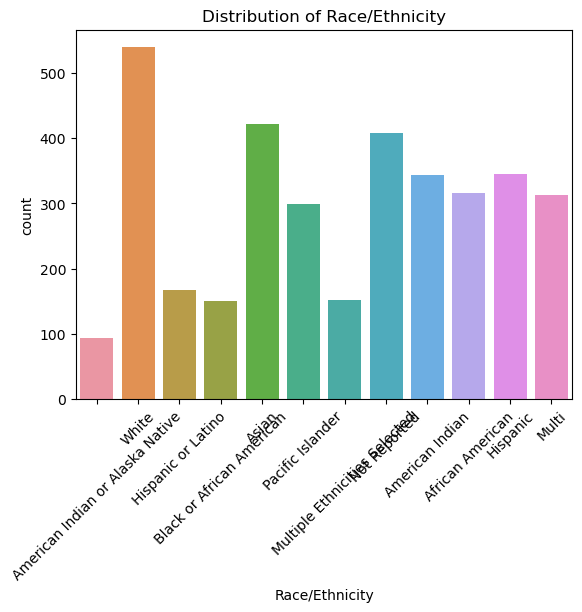

In [108]:
# Distribution of 'Race/Ethnicity'
sns.countplot(x='Race/Ethnicity', data=df_check)
plt.title('Distribution of Race/Ethnicity')
plt.xticks(rotation=45)
plt.show()



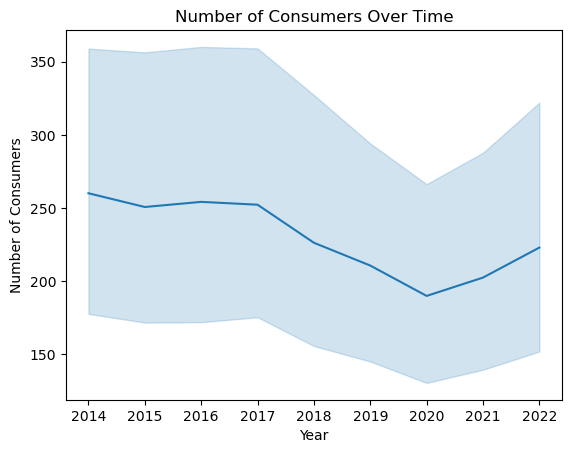

In [109]:
# No. of consumers over years
sns.lineplot(x='Year', y='Number of Consumers', data=df_check)
plt.title('Number of Consumers Over Time')
plt.show()
